In [4]:
%pip install torch torchvision matplotlib

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
    --------------------------------------- 3.9/204.1 MB 19.9 MB/s eta 0:00:11
   - -------------------------------------- 7.9/204.1 MB 19.7 MB/s eta 0:00:10
   -- ------------------------------------- 11.8/204.1 MB 19.6 MB/s eta 0:00:10
   --- ------------------------------------ 15.7/204.1 MB 19.7 MB/s eta 0:00:10
   --- ------------------------------------ 19.9/204.1 MB 19.6 MB/s eta 0:00:10
   ---- ----------------------------------- 24.1/204.1 MB 19.6 MB/s eta 0:00:10
   ----- ---------------------------------- 28.3/204.1 MB 19.6 MB/s eta 0:00:09
   ------ --------------------------------- 32.0/204.1 MB 19.6 MB/s eta 0:00:09
   ------- -------------------------------- 36.2/204.1 MB 19.6 MB/s eta 0:00:09
   ------- -------------------------------- 40.1/204.1 MB 19.5 MB/s eta 0:00:09
   -------- ------------------------------- 44.0/204.1 MB 19.5 MB/s eta 0:00:09
   --------- ------------------------------ 48.0/20

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


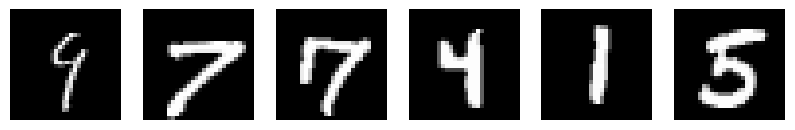

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformation: Convert to tensor & normalize (0 mean, 1 std)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Display some sample images
examples = iter(trainloader)
example_data, example_targets = next(examples)

fig, axes = plt.subplots(1, 6, figsize=(10, 2))
for i in range(6):
    axes[i].imshow(example_data[i].squeeze(), cmap="gray")
    axes[i].axis('off')
plt.show()


In [ ]:
"""
image, label = testset[0]  # You can change the index to get other images

# Convert the tensor image back to a PIL image
image = transforms.ToPILImage()(image)

# Save the image to a file
image.save('test_image.png')"

"""

In [2]:
print(testset[0][0].size())
print(len(testset))

torch.Size([1, 28, 28])
10000


In [4]:
import torch.nn as nn
import torch.nn.functional as F

# Here we define the neural network
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer (784 -> 128)
        self.fc2 = nn.Linear(128, 64)     # Hidden layer (128 -> 64)
        self.fc3 = nn.Linear(64, 10)      # Output layer (64 -> 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten images
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation (logits)
        
        return x

# Initialize model
model = MNISTClassifier()


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [6]:
epochs = 7  # Number of passes through dataset

for epoch in range(epochs):
    running_loss = 0.0 # gives the total loss of all images per EPOCH

    for images, labels in trainloader: # Each iteration is a BATCH
        optimizer.zero_grad()  # Reset gradients

        outputs = model(images)  # Forward pass - make predictions
        loss = criterion(outputs, labels)  # Compute loss - calculate errors between predictions (outputs) and actuals (labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    # calculate the average loss for the EPOCH, by taking the total epoch loss and divide by the # of batches in the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

print("Training complete!")


Epoch 1, Loss: 0.3975
Epoch 2, Loss: 0.1895
Epoch 3, Loss: 0.1375
Epoch 4, Loss: 0.1089
Epoch 5, Loss: 0.0957
Epoch 6, Loss: 0.0845
Epoch 7, Loss: 0.0718
Training complete!


In [7]:
correct = 0
total = 0

with torch.no_grad():  # No gradients needed for testing
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item() # count the total number of correct predictions

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 97.45%


In [8]:
torch.save(model.state_dict(), 'model.pth') # save model as model.pth